# α from Simple Modes: φ, π, √3 — Two Approximants, Tests, and Visualizations

This notebook reproduces two small-integer approximants to the fine-structure constant α, tests them against null models, visualizes how they bracket α, and connects to the Fibonacci→α map and a simple complex-lift experiment.

**Contents**
1. Setup and constants
2. Two α-approximants (101-form and 110-form) + bracket plot
3. Small pre-registered grids around each form
4. Null-model test (empirical *p*)
5. Fibonacci-decimal → α fixed triadic map
6. Residual rungs (2⁻ᵏ vs 3⁻ᵏ)
7. Complex lift: rotate `Z = D(F)+i D(R)` and measure error vs θ


In [1]:

import math, random
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt

mp.mp.dps = 100  # high precision

alpha = mp.mpf("0.007297352566417119")  # CODATA-ish
sqrt5 = mp.sqrt(5)
phi = (1 + sqrt5)/2
sqrt3 = mp.sqrt(3)
pi = mp.pi

print("alpha =", alpha)
print("phi   =", phi)
print("sqrt3 =", sqrt3)
print("pi    =", pi)


alpha = 0.007297352566417119
phi   = 1.618033988749894848204586834365638117720309179805762862135448622705260462818902449707207204189391137
sqrt3 = 1.732050807568877293527446341505872366942805253810380628055806979451933016908800037081146186757248576
pi    = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068


A_you   = 0.00730202380709878207853271496266790430491244395103169255976575189558285657734798757197328810324037254
A_other = 0.007297330487148199958764928666826538153145116141697745587897156622846326483538613556261291608399907203
abs err (you)   = 0.000004671240681663078532714962667904304912443951031692559765751895582856577347987571973288103240372539969    rel = 0.0006401281340249922255953929930697801209359407313345206820912113855598207567889964409644824928298354053
abs err (other) = 0.00000002207926891904123507133317346184685488385830225441210284337715367351646138644373870839160009279680851    rel = 0.000003025654676553718402086009749153613881083938296033845705965279242407640315474090824905521332324104451


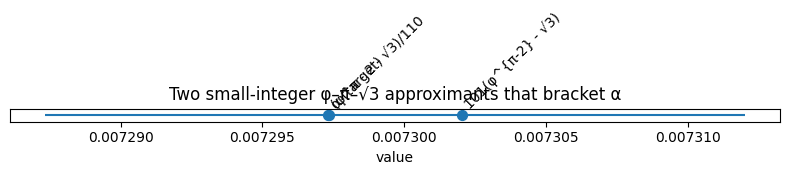

In [2]:

A_you   = 101*(phi**(pi-2) - sqrt3)
A_other = (phi**pi - 2 - sqrt3) / 110

err_you_abs   = mp.fabs(A_you - alpha)
err_you_rel   = err_you_abs / alpha
err_other_abs = mp.fabs(A_other - alpha)
err_other_rel = err_other_abs / alpha

print("A_you   =", A_you)
print("A_other =", A_other)
print("abs err (you)   =", err_you_abs, "   rel =", err_you_rel)
print("abs err (other) =", err_other_abs, "   rel =", err_other_rel)

xs = [float(A_other), float(alpha), float(A_you)]
labels = ["(φ^π - 2 - √3)/110", "α (target)", "101(φ^{π-2} - √3)"]
y = [0,0,0]

plt.figure(figsize=(8,1.6))
plt.scatter(xs, y, s=50)
for x,lab in zip(xs, labels):
    plt.text(x, 0.03, lab, rotation=45, ha='left', va='bottom')
xmin = min(xs) - 1e-5
xmax = max(xs) + 1e-5
plt.hlines(0, xmin, xmax)
plt.yticks([])
plt.title("Two small-integer φ–π–√3 approximants that bracket α")
plt.xlabel("value")
plt.tight_layout()
plt.show()


Top 10 in A-family (abs error):
d=110, u=-1, v=-2, val=0.007297330487148199958764928666826538153145116141697745587897156622846326483538613556261291608399907203, abs_err=0.00000002207926891904123507133317346184685488385830225441210284337715367351646138644373870839160009279680851, rel_err=0.000003025654676553718402086009749153613881083938296033845705965279242407640315474090824905521332324104451
d=111, u=-1, v=-2, val=0.00723158877104776572490218156171999276437804302330407220422240746408194516386709451521389258490080894, abs_err=0.00006576379536935327509781843828000723562195697669592779577759253591805483613290548478610741509919105993, rel_err=0.009012007405535323504722787937589251329071344443356429937186091718168151715627947297213870336455456324
d=109, u=-1, v=-2, val=0.0073642784732688256464600197555130201545501172072179083914558461331476689283417201026490098800366036, abs_err=0.00006692590685170664646001975551302015455011720721790839145584613314766892834172010264900988003660359952, rel_

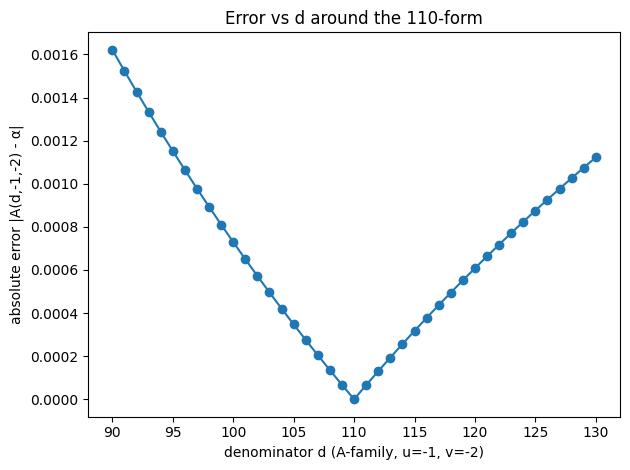

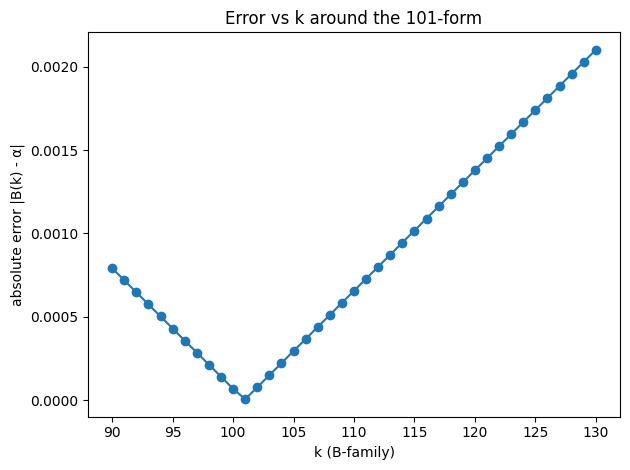

In [3]:

phi_pi = phi**pi

def A_family(d, u, v):
    return (phi_pi + u*sqrt3 + v)/d

best_A = []
for d in range(90, 131):
    for u in range(-2, 3):
        for v in range(-3, 4):
            val = A_family(d,u,v)
            ae  = mp.fabs(val - alpha)
            re  = ae/alpha
            best_A.append((ae, re, d, u, v, val))

best_A.sort(key=lambda t: t[0])
print("Top 10 in A-family (abs error):")
for row in best_A[:10]:
    ae, re, d, u, v, val = row
    print(f"d={d:3d}, u={u:+d}, v={v:+d}, val={val}, abs_err={ae}, rel_err={re}")

def B_family(k):
    return k*(phi**(pi-2) - sqrt3)

best_B = []
for k in range(90, 131):
    val = B_family(k)
    ae  = mp.fabs(val - alpha)
    re  = ae/alpha
    best_B.append((ae, re, k, val))

best_B.sort(key=lambda t: t[0])
print("\nTop 10 in B-family (abs error):")
for row in best_B[:10]:
    ae, re, k, val = row
    print(f"k={k:3d}, val={val}, abs_err={ae}, rel_err={re}")

# error vs d (A-family at u=-1, v=-2)
errs = []
ds = list(range(90, 131))
for d in ds:
    val = A_family(d, -1, -2)
    errs.append(float(mp.fabs(val - alpha)))

plt.figure()
plt.plot(ds, errs, marker='o')
plt.xlabel("denominator d (A-family, u=-1, v=-2)")
plt.ylabel("absolute error |A(d,-1,-2) - α|")
plt.title("Error vs d around the 110-form")
plt.tight_layout()
plt.show()

# error vs k (B-family)
ks = list(range(90, 131))
errsB = [float(mp.fabs(B_family(k) - alpha)) for k in ks]
plt.figure()
plt.plot(ks, errsB, marker='o')
plt.xlabel("k (B-family)")
plt.ylabel("absolute error |B(k) - α|")
plt.title("Error vs k around the 101-form")
plt.tight_layout()
plt.show()


Our A(110,-1,-2) abs error = 2.2079268919041235e-08
Empirical p-value (null <= ours) = 0.0


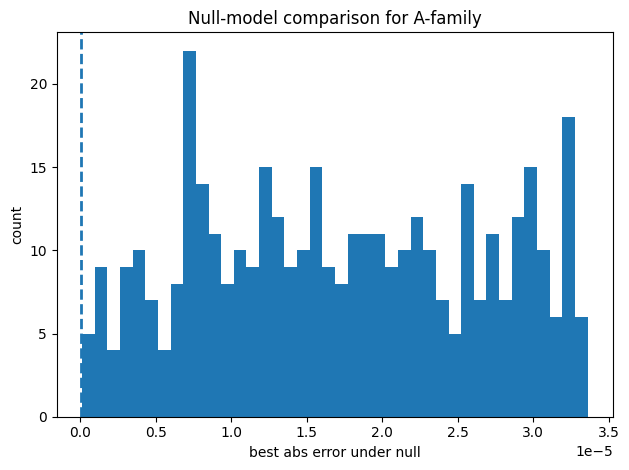

In [4]:

import numpy as np, random

rng = random.Random(12345)

def jitter(val, width):
    return val + (2*rng.random()-1)*width

def run_null(trials=400, d_range=range(90,131), u_opts=range(-2,3), v_opts=range(-3,4)):
    null_best = []
    base_ae = mp.fabs(A_family(110,-1,-2) - alpha)
    for _ in range(trials):
        pi_p  = jitter(pi, 0.005)
        s3_p  = jitter(sqrt3, 0.01)
        phi_pi_p = phi**pi_p  # jitter exponent only
        best = 1e9
        for d in d_range:
            for u in u_opts:
                for v in v_opts:
                    val = (phi_pi_p + u*s3_p + v)/d
                    ae  = float(mp.fabs(val - alpha))
                    if ae < best:
                        best = ae
        null_best.append(best)
    return float(base_ae), np.array(null_best)

base_err, null_errs = run_null(trials=400)
p_emp = float((null_errs <= base_err).mean())
print("Our A(110,-1,-2) abs error =", base_err)
print("Empirical p-value (null <= ours) =", p_emp)

plt.figure()
plt.hist(null_errs, bins=40)
plt.axvline(base_err, linestyle='--', linewidth=2)
plt.xlabel("best abs error under null")
plt.ylabel("count")
plt.title("Null-model comparison for A-family")
plt.tight_layout()
plt.show()


In [5]:

def fib_word(N):
    s = "0"
    out = []
    while len(out) < N:
        nxt = []
        for ch in s:
            if ch == '0':
                nxt.extend(['0','1'])
            else:
                nxt.extend(['0'])
        s = "".join(nxt)
        need = min(N - len(out), len(s))
        out.extend(list(s[:need]))
        s = s[need:]
    return list(map(int, out))

def D_decimal(bits):
    total = mp.mpf('0')
    ten = mp.mpf('10')
    p = mp.mpf('1')
    for b in bits:
        p /= ten
        if b: total += p
    return total

Ns = list(range(20, 401, 20))
errs = []
first_val = None
for N in Ns:
    F = fib_word(N)
    DF = D_decimal(F)
    Phi = mp.mpf(729)/1000 * DF
    if first_val is None:
        first_val = Phi
    errs.append(float(mp.fabs(Phi - alpha)))

print("Phi(F_20) =", first_val)
print("Errors (first 5 N) =", errs[:5])

plt.figure()
plt.plot(Ns, errs, marker='o')
plt.yscale('log')
plt.xlabel("N (Fibonacci digits)")
plt.ylabel("|(3^6/10^3)·D(F_N) - α|")
plt.title("Stability of the Fibonacci→α map")
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:

bases = [2,3,5,7,10]

def best_rung(ratio, K=12):
    best = (1e9, None, None)
    for b in bases:
        for k in range(1, K+1):
            target = (b**(-k))
            rel = abs(float(ratio/target) - 1.0)
            if rel < best[0]:
                best = (rel, b, k)
    return best

ratios = []
for d in range(95, 126):
    val = A_family(d, -1, -2)
    r = mp.fabs(val - alpha)/alpha
    ratios.append(float(r))
for k in range(95, 126):
    val = B_family(k)
    r = mp.fabs(val - alpha)/alpha
    ratios.append(float(r))

closeness, bases_best, ks_best = [], [], []
for r in ratios:
    rel, b, k = best_rung(r, K=12)
    closeness.append(rel)
    bases_best.append(b)
    ks_best.append(k)

from collections import Counter
counts = Counter(bases_best)
xs = sorted(counts.keys())
ys = [counts[x] for x in xs]

plt.figure()
plt.bar([str(x) for x in xs], ys)
plt.xlabel("base b of best rung (ratio ≈ b^{-k})")
plt.ylabel("count")
plt.title("Residual rung preference (local A/B families)")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(closeness, bins=30)
plt.xlabel("relative closeness to best b^{-k}")
plt.ylabel("count")
plt.title("Rung match quality")
plt.tight_layout()
plt.show()


In [ ]:

def rabbit_from_fib_bits(Fbits):
    return [1-b for b in Fbits]

N = 400
Fbits = fib_word(N)
Rbits = rabbit_from_fib_bits(Fbits)

DF = D_decimal(Fbits)
DR = D_decimal(Rbits)
Z  = DF + 1j*DR

S = 729/1000
thetas = np.linspace(0, 2*np.pi, 241)
errs_theta = []
for th in thetas:
    Zt = Z * complex(math.cos(th), math.sin(th))
    val = S * Zt.real
    errs_theta.append(abs(val - float(alpha)))

plt.figure()
plt.plot(thetas, errs_theta)
plt.xlabel("θ (radians)")
plt.ylabel("| S·Re(e^{iθ}Z) - α |")
plt.title("Complex-lift rotation: error vs θ")
plt.tight_layout()
plt.show()
